In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import umap

from pscapes.landscape_class import ProteinLandscape


        Protein Landscape class
            Number of Sequences : 46656
            Max Distance        : 6
            Number of Distances : 7
            Seed Sequence       : AAAAAA
                Modified positions are shown in green
            
        


/home/dana/Documents/2025_NK/nk-2025/.env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/dana/Documents/2025_NK/nk-2025/.env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


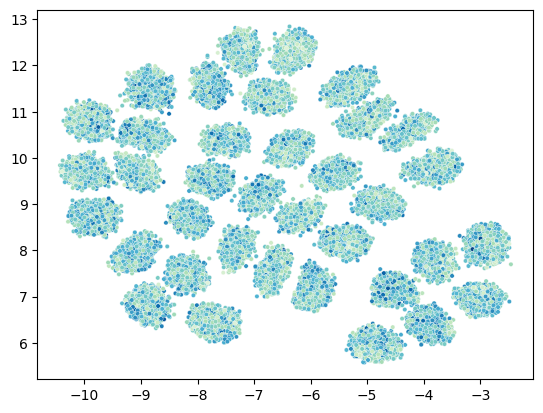

In [29]:
landscape = ProteinLandscape(csv_path="../data/nk_landscapes/k3_r0.csv")

ohe = np.array(landscape.ohe)
ohe = [
    i.flatten().reshape(-1, 1) 
    for i in ohe
]
ohe = np.squeeze(np.array(ohe))

f = landscape.fitnesses
logf = np.log((f.astype(np.float64) + 1e-5))

umapper = umap.UMAP(random_state=0, metric="cosine")
reduced = umapper.fit_transform(ohe)

sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], c=f, s=10, cmap="GnBu")
plt.savefig('fig1_nk_umap.svg', bbox_inches='tight')
plt.show()

In [5]:
gb1_ohe = np.array(gb1_landscape.ohe)

In [6]:
gb1_ohe_flat = gb1_ohe.reshape(gb1_ohe.shape[0], -1)

In [7]:
gb1_ohe_flat_cp = cp.array(gb1_ohe_flat)

In [8]:
k = np.round(np.log2(gb1_ohe.shape[0])*2)

In [9]:
knn = NearestNeighbors(n_neighbors=int(k), algorithm="brute", metric="euclidean")

In [10]:
knn.fit(gb1_ohe_flat_cp)

NearestNeighbors()

In [11]:
distances, indices = knn.kneighbors(gb1_ohe_flat_cp)

In [12]:
adj_matrix = np.zeros((gb1_ohe_flat_cp.shape[0], gb1_ohe_flat_cp.shape[0]), dtype=cp.float32)

for i in range(gb1_ohe_flat_cp.shape[0]):
    adj_matrix[i, indices[i].get()] = distances[i].get()



In [13]:
adj_matrix[adj_matrix>0]=1

In [14]:
gb1_nx_graph = nx.from_numpy_array(adj_matrix)

In [15]:
gb1_force_atlas = cugraph.force_atlas2(gb1_nx_graph)

/home/ubuntu/.local/lib/python3.10/site-packages/cugraph/structure/symmetrize.py:260: FutureWarning: This method is deprecated and will no longer be supported. The symmetrization of the edges are only supported by setting the 'symmetrize' flag to 'True'
  warnings.warn(
/home/ubuntu/.local/lib/python3.10/site-packages/cugraph/structure/symmetrize.py:92: FutureWarning: Multi is deprecated and the removal of multi edges will no longer be supported from 'symmetrize'. Multi edges will be removed upon creation of graph instance.
  warnings.warn(


In [16]:
gb1_force_atlas_layout = {int(row['vertex']): (row['x'], row['y'])for _, row in gb1_force_atlas.to_pandas().iterrows()} 

In [18]:
logf = np.log((gb1_landscape.fitnesses.astype(np.float64) + 1e-5))

In [19]:
seqs = gb1_landscape.sequences

In [20]:
labels = {node: seqs[i] for i, node in enumerate(gb1_nx_graph.nodes) if node % 1000 == 0}

{0: Text(397.7517395019531, 750.5827026367188, 'VDGV'),
 1000: Text(-798.8524169921875, 773.0941162109375, 'TDWV'),
 2000: Text(-784.447265625, 8969.75, 'VWGS'),
 3000: Text(-5952.01513671875, 3599.5107421875, 'CDEL'),
 4000: Text(-3500.216796875, -7084.3994140625, 'DDAP'),
 5000: Text(-7568.3427734375, 52.12180709838867, 'EDFW'),
 6000: Text(1176.8382568359375, -5855.06396484375, 'FDDH'),
 7000: Text(-397.95745849609375, 1032.9771728515625, 'GCVV'),
 8000: Text(-4156.15234375, -5873.8955078125, 'HAGP'),
 9000: Text(1198.26123046875, 1190.6947021484375, 'HWYV'),
 10000: Text(7972.2099609375, -7208.63037109375, 'IVGT'),
 11000: Text(2509.92919921875, 1521.7537841796875, 'KSRV'),
 12000: Text(-352.549072265625, -131.44198608398438, 'LRGD'),
 13000: Text(1782.3822021484375, 1784.4739990234375, 'MPKV'),
 14000: Text(6103.76220703125, 3702.585693359375, 'NNGI'),
 15000: Text(-1125.1307373046875, -666.4267578125, 'PMDV'),
 16000: Text(-4711.5947265625, -7146.69580078125, 'QKGP'),
 17000: Tex

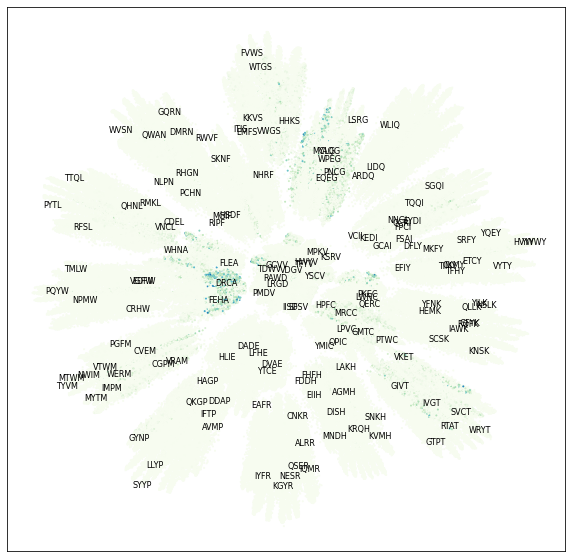

In [21]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(gb1_nx_graph, gb1_force_atlas_layout, 
                               node_color=gb1_landscape.fitnesses,cmap='GnBu', 
                                node_size=1)

nx.draw_networkx_labels(gb1_nx_graph, gb1_force_atlas_layout,
                        labels, font_size=8, font_color="k")
#plt.colorbar()

{0: Text(397.7517395019531, 750.5827026367188, 'VDGV'),
 1000: Text(-798.8524169921875, 773.0941162109375, 'TDWV'),
 2000: Text(-784.447265625, 8969.75, 'VWGS'),
 3000: Text(-5952.01513671875, 3599.5107421875, 'CDEL'),
 4000: Text(-3500.216796875, -7084.3994140625, 'DDAP'),
 5000: Text(-7568.3427734375, 52.12180709838867, 'EDFW'),
 6000: Text(1176.8382568359375, -5855.06396484375, 'FDDH'),
 7000: Text(-397.95745849609375, 1032.9771728515625, 'GCVV'),
 8000: Text(-4156.15234375, -5873.8955078125, 'HAGP'),
 9000: Text(1198.26123046875, 1190.6947021484375, 'HWYV'),
 10000: Text(7972.2099609375, -7208.63037109375, 'IVGT'),
 11000: Text(2509.92919921875, 1521.7537841796875, 'KSRV'),
 12000: Text(-352.549072265625, -131.44198608398438, 'LRGD'),
 13000: Text(1782.3822021484375, 1784.4739990234375, 'MPKV'),
 14000: Text(6103.76220703125, 3702.585693359375, 'NNGI'),
 15000: Text(-1125.1307373046875, -666.4267578125, 'PMDV'),
 16000: Text(-4711.5947265625, -7146.69580078125, 'QKGP'),
 17000: Tex

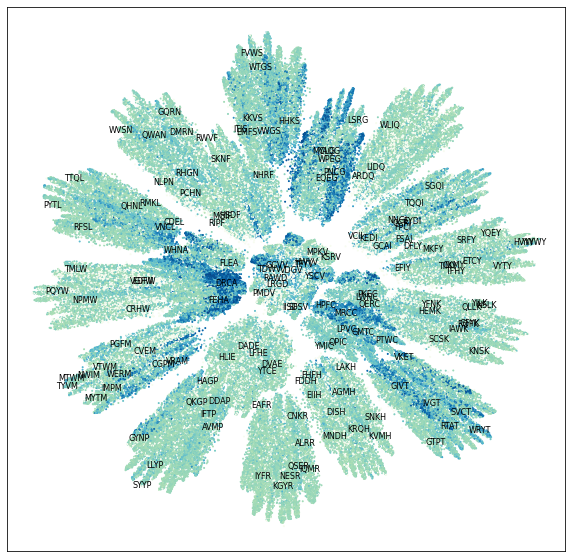

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(gb1_nx_graph, gb1_force_atlas_layout, 
                               node_color=logf,cmap='GnBu', 
                                node_size=1)

nx.draw_networkx_labels(gb1_nx_graph, gb1_force_atlas_layout,
                        labels, font_size=8, font_color="k")
#plt.colorbar()

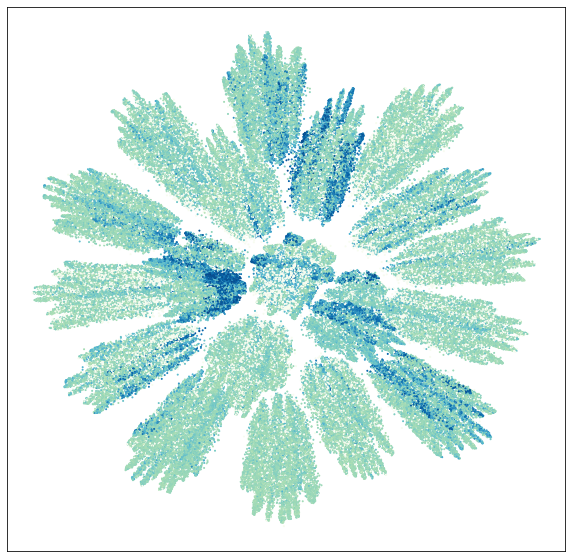

In [25]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(gb1_nx_graph, gb1_force_atlas_layout, 
                               node_color=logf,cmap='GnBu', vmin=np.min(logf), vmax=np.max(logf),
                                node_size=1)
plt.savefig('gb1_knn.png', dpi=1000)

In [27]:
np.max(logf)

2.170421410993645

In [ ]:
nx.draw_networkx_nodes(nk_nx_graphs[k_index][replicate_index], nk_layouts[k_index][replicate_index], 
                               node_color=landscapes_y[k_index][replicate_index],cmap='magma', ax=ax[k_index][re